# July 2023 Cu-B DARK

dTHF + LiBF4 + dEtOH



In [2]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/analysis_playground/bayesian-fitting'))
sys.path.append(os.path.expanduser('~/git/nh3-analysis'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    from bumps import dream
    import fit_uncertainties
    importlib.reload(fit_uncertainties)
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

import summary_plots

In [3]:
project_dir = os.path.expanduser('~/git/nh3-analysis/july2023/')
data_dir = os.path.expanduser('/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-B')

# Auto-reduction directory
ar_dir = '/SNS/REF_L/IPTS-30384/shared/autoreduce/'

# Directory with fit results
fit_dir = '/SNS/users/m2d/git/nh3-analysis/pec-july2023/dyn-fitting/'

dynamic_run = 207019 # Cycle 1

dyn_data_dir = '/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-B/30s'
dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/pec-july2023/dyn-fitting/207019-dyn/results-30s-bck'

# dyn_data_dir = '/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-F/15s'
# dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207168-dyn/results-15s-bck'

delta_t = 30

## Summary of 60 Hz data

/SNS/users/m2d/git/nh3-analysis/pec-july2023/dyn-fitting/207012/__model-profile.dat
/SNS/users/m2d/git/nh3-analysis/pec-july2023/dyn-fitting/207020/__model-profile.dat


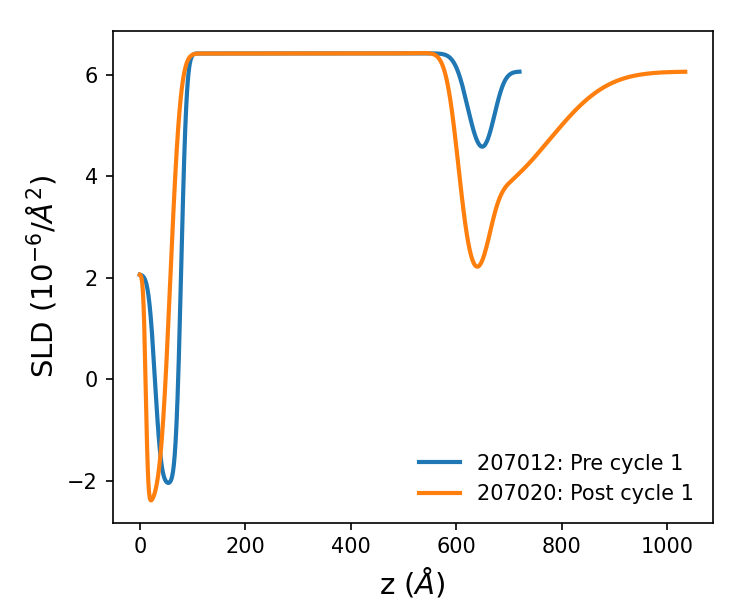

In [4]:
importlib.reload(summary_plots)
    
fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

summary_plots.plot_sld(207012, "207012: Pre cycle 1", fit_dir=fit_dir, show_cl=False)
summary_plots.plot_sld(207020, "207020: Post cycle 1", fit_dir=fit_dir, show_cl=False)

plt.legend(loc='lower right', frameon=False, fontsize=10)
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.show()


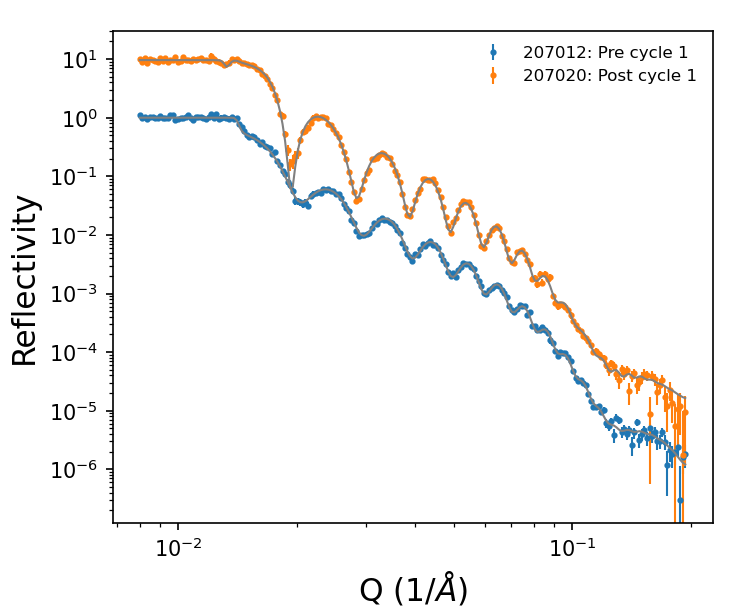

In [5]:
importlib.reload(summary_plots)

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

multiplier = 10
scale = 1
summary_plots.plot_fit(207012, '207012: Pre cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(207020, '207020: Post cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier

plt.legend(frameon=False, prop={'size': 8})
plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.yscale('log')
plt.xscale('log')


## CP 1: Change as a function of time

/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-B/30s
21
Ref r207019_t000000.txt
Skipped: 0


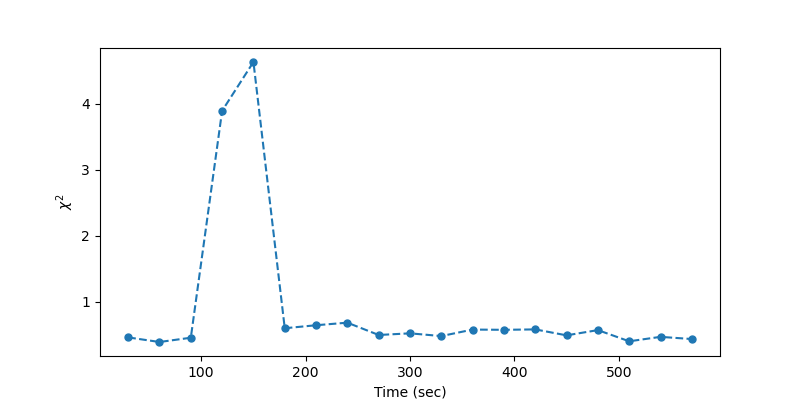

In [6]:
importlib.reload(summary_plots)
print(dyn_data_dir)
chi2 = summary_plots.detect_changes(207019, dyn_data_dir, first=0, last=-1, out_array=None)

21


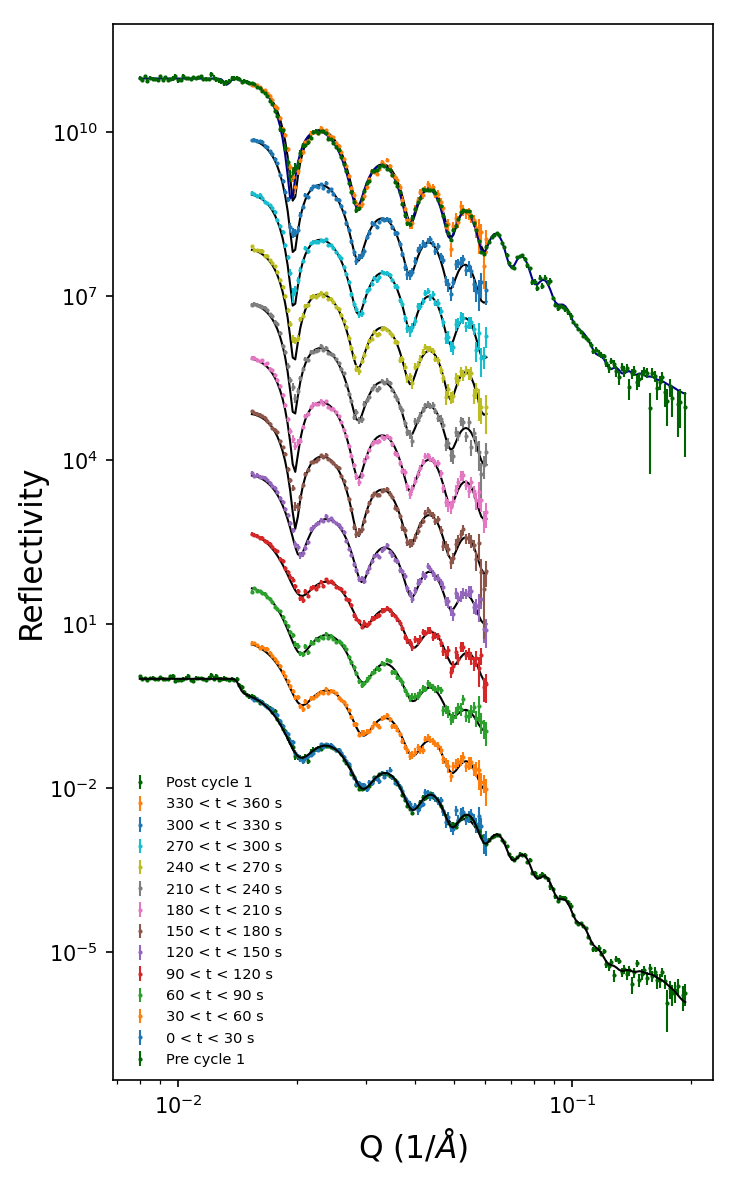

In [7]:
importlib.reload(summary_plots)

last_time = 12

file_list = summary_plots.plot_dyn_data(dynamic_run, 207012, 207020, first_index=0, last_index=last_time, delta_t=delta_t, model_name='model-loop-207019',
                                        fit_dir=fit_dir, ar_dir=ar_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir)

/SNS/users/m2d/git/nh3-analysis/pec-july2023/dyn-fitting/207012/__model-profile.dat
/SNS/users/m2d/git/nh3-analysis/pec-july2023/dyn-fitting/207020/__model-profile.dat


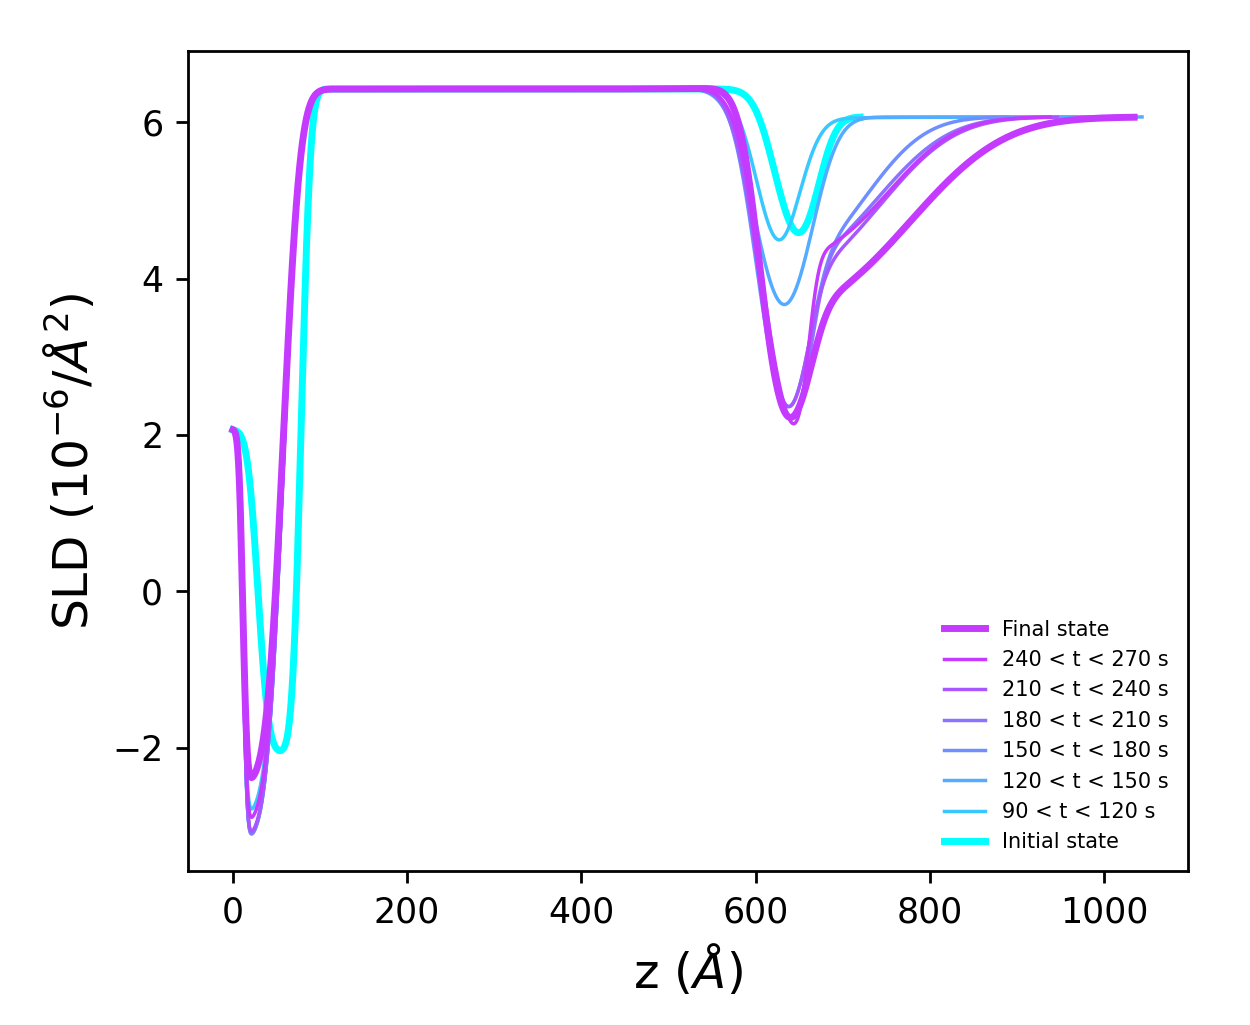

In [8]:
# Plot manual fits
importlib.reload(summary_plots)

# model_file = os.path.join(project_dir, 'model-207275.py')
model_file = os.path.join(dyn_fit_dir, str(file_list[-1][2]), 'model-loop-207019.py')

_file_list = [file_list[i] for i in [3,4,5,6,7,8]]

summary_plots.plot_dyn_sld(_file_list, 207012, 207020, 
                           fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, delta_t=30, 
                           show_cl=False, model_file=model_file, model_name='model-loop-207019')

THF interface 16.05343103825421
Cu thickness 543.7791039833314
Ti rho -2.0692439993748803
THF interface [16.05343103825421, 85.57218083150923]
Cu thickness [543.7791039833314, 546.7067013886534]
Ti rho [-2.0692439993748803, -2.4770927470026867]
SEI interface [15.802938997781064]
SEI rho [3.399485748395744]
SEI thickness [114.49641805140634]
Plated interface [19.100652998526662]
Plated rho [1.8219006440551015]
Plated thickness [58.74259486583032]


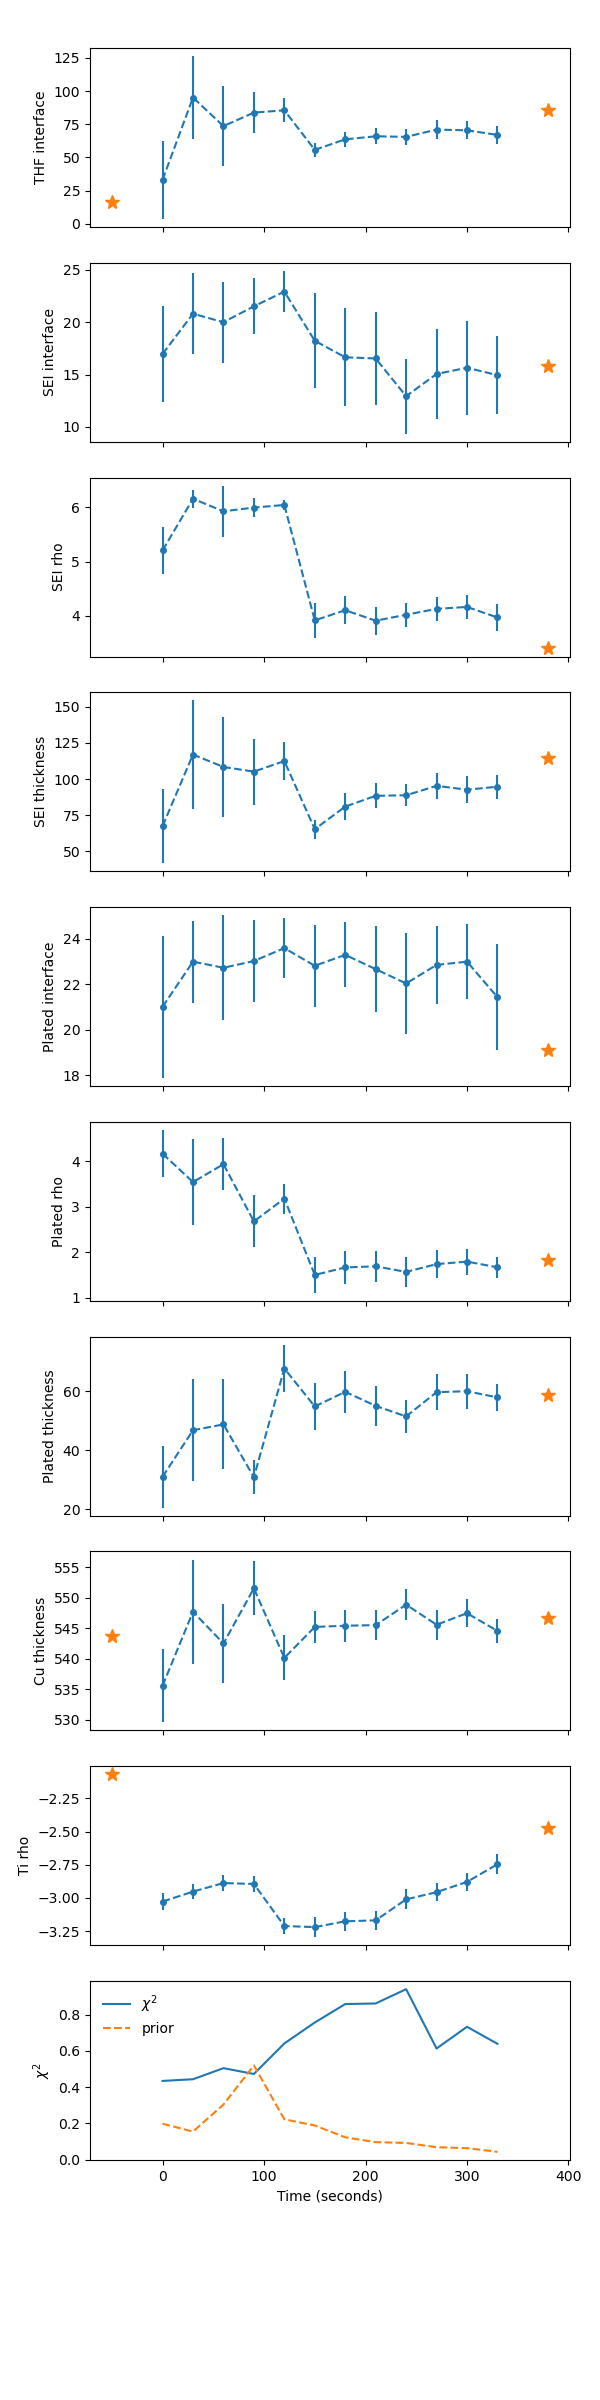

In [9]:
importlib.reload(summary_plots)

initial_state = 207012
timestamps, trend_data, trend_err = summary_plots.trend_data(file_list, initial_state, 207020, 
                                                   fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                                                   model_name='model-loop-207019', model_file=None, add_plot=0)


In [9]:
importlib.reload(summary_plots)

trend_file = os.path.join(dyn_fit_dir, 'trend-model-loop-207019.json')
summary_plots.write_md_table(trend_file)

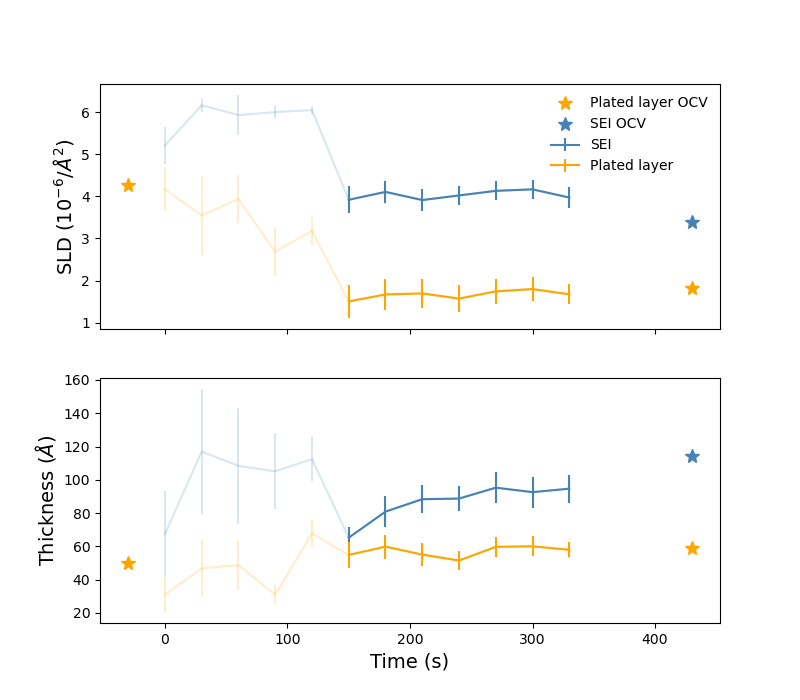

In [7]:
material_rho = [4.27, 1.8219006440551015]
material_thickness = [49.76, 58.74259486583032]
sei_rho = [3.399485748395744]
sei_thickness = [114.49641805140634]


i_start = 5

fig, axs = plt.subplots(2, 1, dpi=100, figsize=(8,7), sharex=True)
plt.subplot(2, 1, 1)
plt.errorbar(timestamps, trend_data['SEI rho'], yerr=trend_err['SEI rho'], alpha=0.2, color='steelblue')
plt.errorbar(timestamps, trend_data['Plated rho'], yerr=trend_err['Plated rho'], alpha=0.2, color='orange')

plt.errorbar(timestamps[i_start:], trend_data['SEI rho'][i_start:], yerr=trend_err['SEI rho'][i_start:], label='SEI', color='steelblue')
plt.errorbar(timestamps[i_start:], trend_data['Plated rho'][i_start:], yerr=trend_err['Plated rho'][i_start:], label='Plated layer', color='orange')

plt.plot([timestamps[0]-30, timestamps[-1]+100], material_rho, linestyle='', marker='*', color='orange', markersize=10, label='Plated layer OCV')
plt.plot([timestamps[-1]+100], sei_rho, linestyle='', marker='*', color='steelblue', markersize=10, label='SEI OCV')

#plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.legend(frameon=False)



plt.subplot(2, 1, 2)
plt.errorbar(timestamps, trend_data['SEI thickness'], yerr=trend_err['SEI thickness'], alpha=0.2, color='steelblue')
plt.errorbar(timestamps, trend_data['Plated thickness'], yerr=trend_err['Plated thickness'], alpha=0.2, color='orange')
plt.errorbar(timestamps[i_start:], trend_data['SEI thickness'][i_start:], yerr=trend_err['SEI thickness'][i_start:], color='steelblue')
plt.errorbar(timestamps[i_start:], trend_data['Plated thickness'][i_start:], yerr=trend_err['Plated thickness'][i_start:], color='orange')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Thickness ($\AA$)', fontsize=14)

plt.plot([timestamps[0]-30, timestamps[-1]+100], material_thickness, linestyle='', marker='*', color='orange', markersize=10, label='Plated layer OCV')
plt.plot([timestamps[-1]+100], sei_thickness, linestyle='', marker='*', color='steelblue', markersize=10, label='SEI OCV')
